In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 1. 读取数据
data_path = 'bike.csv'
df = pd.read_csv(data_path)

# 2. 剔除 `id` 列
df = df.drop(columns=['id'])

# 3. 筛选上海市的数据并剔除 `city` 列
shanghai_data = df[df['city'] == 1].copy()  
shanghai_data.drop(columns=['city'], inplace=True)

# 4. 简化hour列
shanghai_data.loc[:, 'hour'] = shanghai_data['hour'].apply(lambda x: 1 if 6 <= x <= 18 else 0)

# 5. 提取目标列y并转换为 numpy 列向量
y = shanghai_data['y'].to_numpy().reshape(-1, 1)
shanghai_data = shanghai_data.drop(columns=['y'])

# 6. 转换 DataFrame 为 Numpy 数组
X = shanghai_data.to_numpy()

# 7. 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. 数据归一化
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# 9. 构建线性回归模型并训练
model = LinearRegression()
model.fit(X_train, y_train)

# 10. 利用测试集评估模型
y_pred = model.predict(X_test)

# 11. 计算均方根误差（RMSE）
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"测试集RMSE: {rmse}")

测试集RMSE: 0.1652799928539963


Matplotlib is building the font cache; this may take a moment.


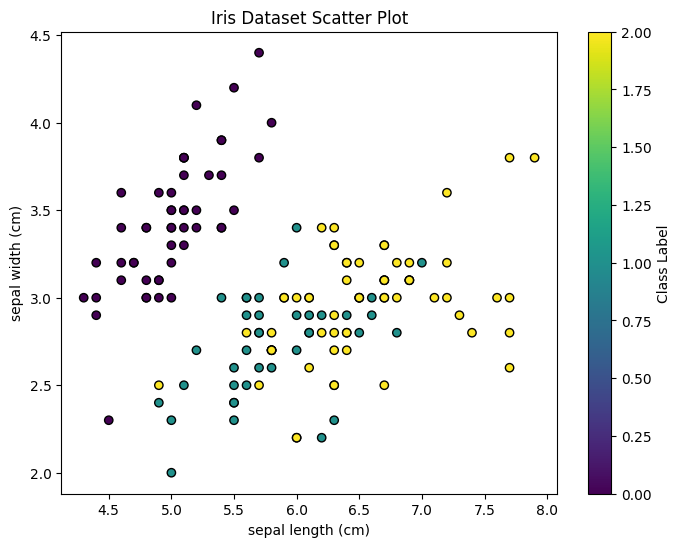

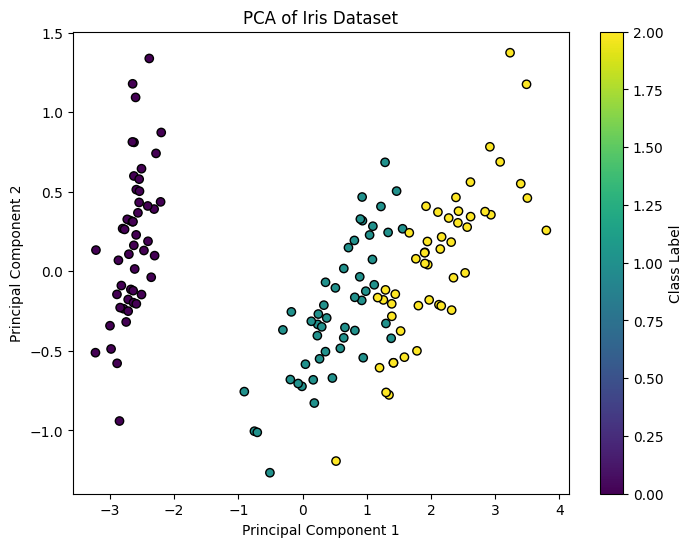

测试集分类准确率: 1.00


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. 加载数据，划分数据集，训练集比例0.2，随机种子42
iris = load_iris()
X = iris.data  
y = iris.target 
feature_names = iris.feature_names
target_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. 以花萼长度为横轴，花萼长度为纵轴绘制数据的散点图
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("Iris Dataset Scatter Plot")
plt.colorbar(label='Class Label')
plt.show()

# 3. 对鸢尾花数据的特征进行PCA降维，并且可视化降维后的结果，x轴为主成分1，y轴为主成分2
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Iris Dataset")
plt.colorbar(label='Class Label')
plt.show()

# 4.以K=3训练分类器
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 5.在测试集上进行测试，最后输出分类准确率
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"测试集分类准确率: {accuracy:.2f}")